In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
import cftime 
import psutil
import xesmf as xe

In [3]:
from src.multi_model_large_ensemble import MultiModelLargeEnsemble

In [15]:
mmle = MultiModelLargeEnsemble(['MIROC6', 'cesm_lens', 'CanESM5', 'MPI-ESM1-2-LR', 'EC-Earth3'], 'tasmax', 'day', 
                               lat=40, lon=10, 
                               bucket='climateai_data_repository', path='tmp/global_cmip_2.5deg')

In [16]:
mmle.compute_x(x_type='quantile_return', load=True, return_period=100)

100%|██████████| 1/1 [00:02<00:00,  2.36s/it]

6.7254791259765625



  0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))

100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

6.600093841552734




100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


100%|██████████| 1/1 [00:02<00:00,  2.26s/it]

7.0375518798828125



100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

7.014865875244141





  0%|          | 0/1 [00:00<?, ?it/s]/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/utils.py:35: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/opt/conda/envs/analogs/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))



100%|██████████| 1/1 [00:02<00:00,  2.14s/it]

7.443668365478516


In [17]:
mmle.x

<xarray.DataArray 'tasmax' (model: 5, member_id: 70, time: 181, lat: 1, lon: 1)>
array([[[[[nan]],

         [[nan]],

         [[nan]],

         ...,

         [[nan]],

         [[nan]],

         [[nan]]],


        [[[nan]],

         [[nan]],

         [[nan]],
...
         [[nan]],

         [[nan]],

         [[nan]]],


        [[[nan]],

         [[nan]],

         [[nan]],

         ...,

         [[nan]],

         [[nan]],

         [[nan]]]]])
Coordinates:
  * model      (model) <U13 'MIROC6' 'cesm_lens' ... 'MPI-ESM1-2-LR' 'EC-Earth3'
  * time       (time) datetime64[ns] 1920-01-01 1921-01-01 ... 2100-01-01
  * member_id  (member_id) int64 1 2 3 4 5 6 7 8 9 ... 63 64 65 66 67 68 69 70
  * lat        (lat) float64 40.0
  * lon        (lon) float64 10.0
    quantile   (model) float64 1.0 1.0 1.0 1.0 1.0
    q_values   (model, lat, lon) float64 318.1 306.9 306.6 303.0 309.6

In [18]:
mmle.compute_LE()

/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


In [19]:
mmle.results

<xarray.Dataset>
Dimensions:   (time: 181, lat: 1, lon: 1, model: 5)
Coordinates:
  * time      (time) datetime64[ns] 1920-01-01 1921-01-01 ... 2100-01-01
  * lat       (lat) float64 40.0
  * lon       (lon) float64 10.0
  * model     (model) <U13 'MIROC6' 'cesm_lens' ... 'MPI-ESM1-2-LR' 'EC-Earth3'
    quantile  (model) float64 1.0 1.0 1.0 1.0 1.0
    q_values  (model, lat, lon) float64 318.1 306.9 306.6 303.0 309.6
Data variables:
    M_LE      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    I_LE      (model, time, lat, lon) float64 nan nan nan nan ... nan nan nan
    Ibar_LE   (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    T_LE      (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

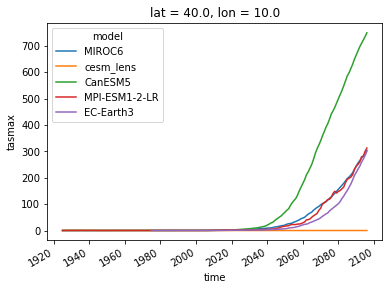

In [20]:
mmle.x.mean('member_id').isel(lat=0, lon=0).plot(hue='model')

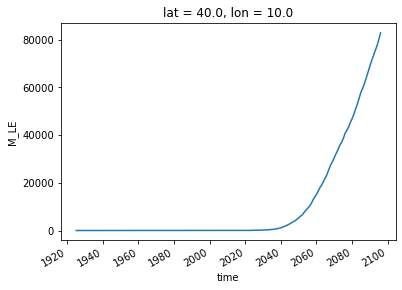

In [8]:
mmle.results['M_LE'].isel(lat=0, lon=0).plot(hue='model')

In [9]:
mmle.compute_FIT()

/opt/conda/envs/analogs/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


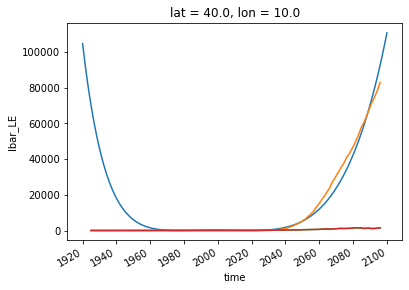

In [13]:
mmle.results['M_FIT'].isel(lat=0, lon=0).plot()
mmle.results['M_LE'].isel(lat=0, lon=0).plot()
mmle.results['Ibar_FIT'].isel(lat=0, lon=0).plot()
mmle.results['Ibar_LE'].isel(lat=0, lon=0).plot()